You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null category
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: category(1), int64(1), object(8)
memory usage: 169.5+ KB
****************************
Rows 2372 in total and Columns 10 in total
****************************
Columns and their datatypes
SNo                    int64
Date            

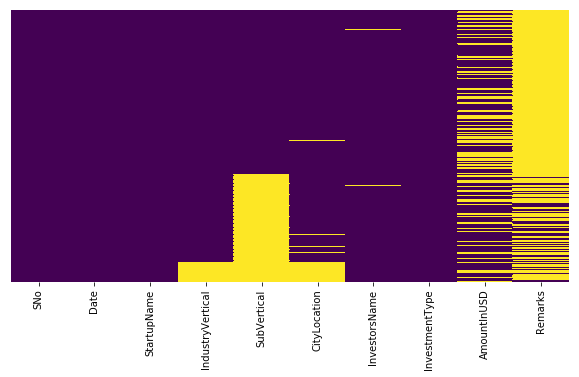

************Print Wrong Format Dates****************
Here we can see in date column error- '.' is there instead of '/'
2103    12/05.2015
2104    12/05.2015
Name: Date, dtype: object
*************Fill Null values as not specific or others***************
*************Converting Multiple City names into one***************
*************Deleting Insignificant Columns which has high number of NA values***************
*************Investment type column has repeated values of categories therefore, removing them***************
Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- 
Different categories of Inverstment Type after cleansing and removing duplicacy in categories are as follows- 
*************Fomatting dates to time series***************
*************Preprocessing number of investors for each startup***************
*************FILLING MISSING VALUES IN AmountInUSD***************
*************FILLING MISSING VALUES IN Investme

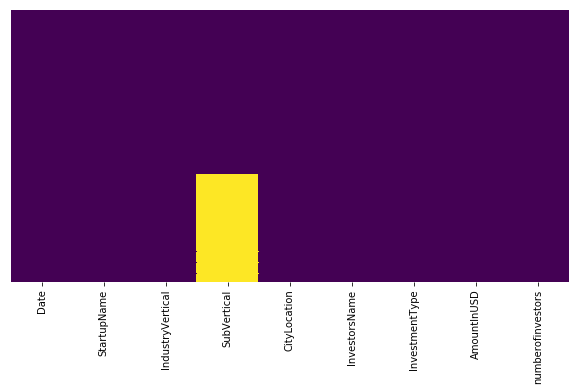

*************Removing ambigous records(startup names like flipkart and flipkart.com )***************
*************Export Cleaned data to another excel sheet***************
*************In depth analysis***************
1792
amount funded on top 10 startups
InvestmentType  privateequity  seedfunding
StartupName                               
ola                        16            7
oyo                         6            2
paytm                       6            0
flipkart                    5            0
cartrade                    3            0
delhivery                   3            0
quikr                       3            0
shopclues                   3            0
foodpanda                   2            0
snapdeal                    2            0


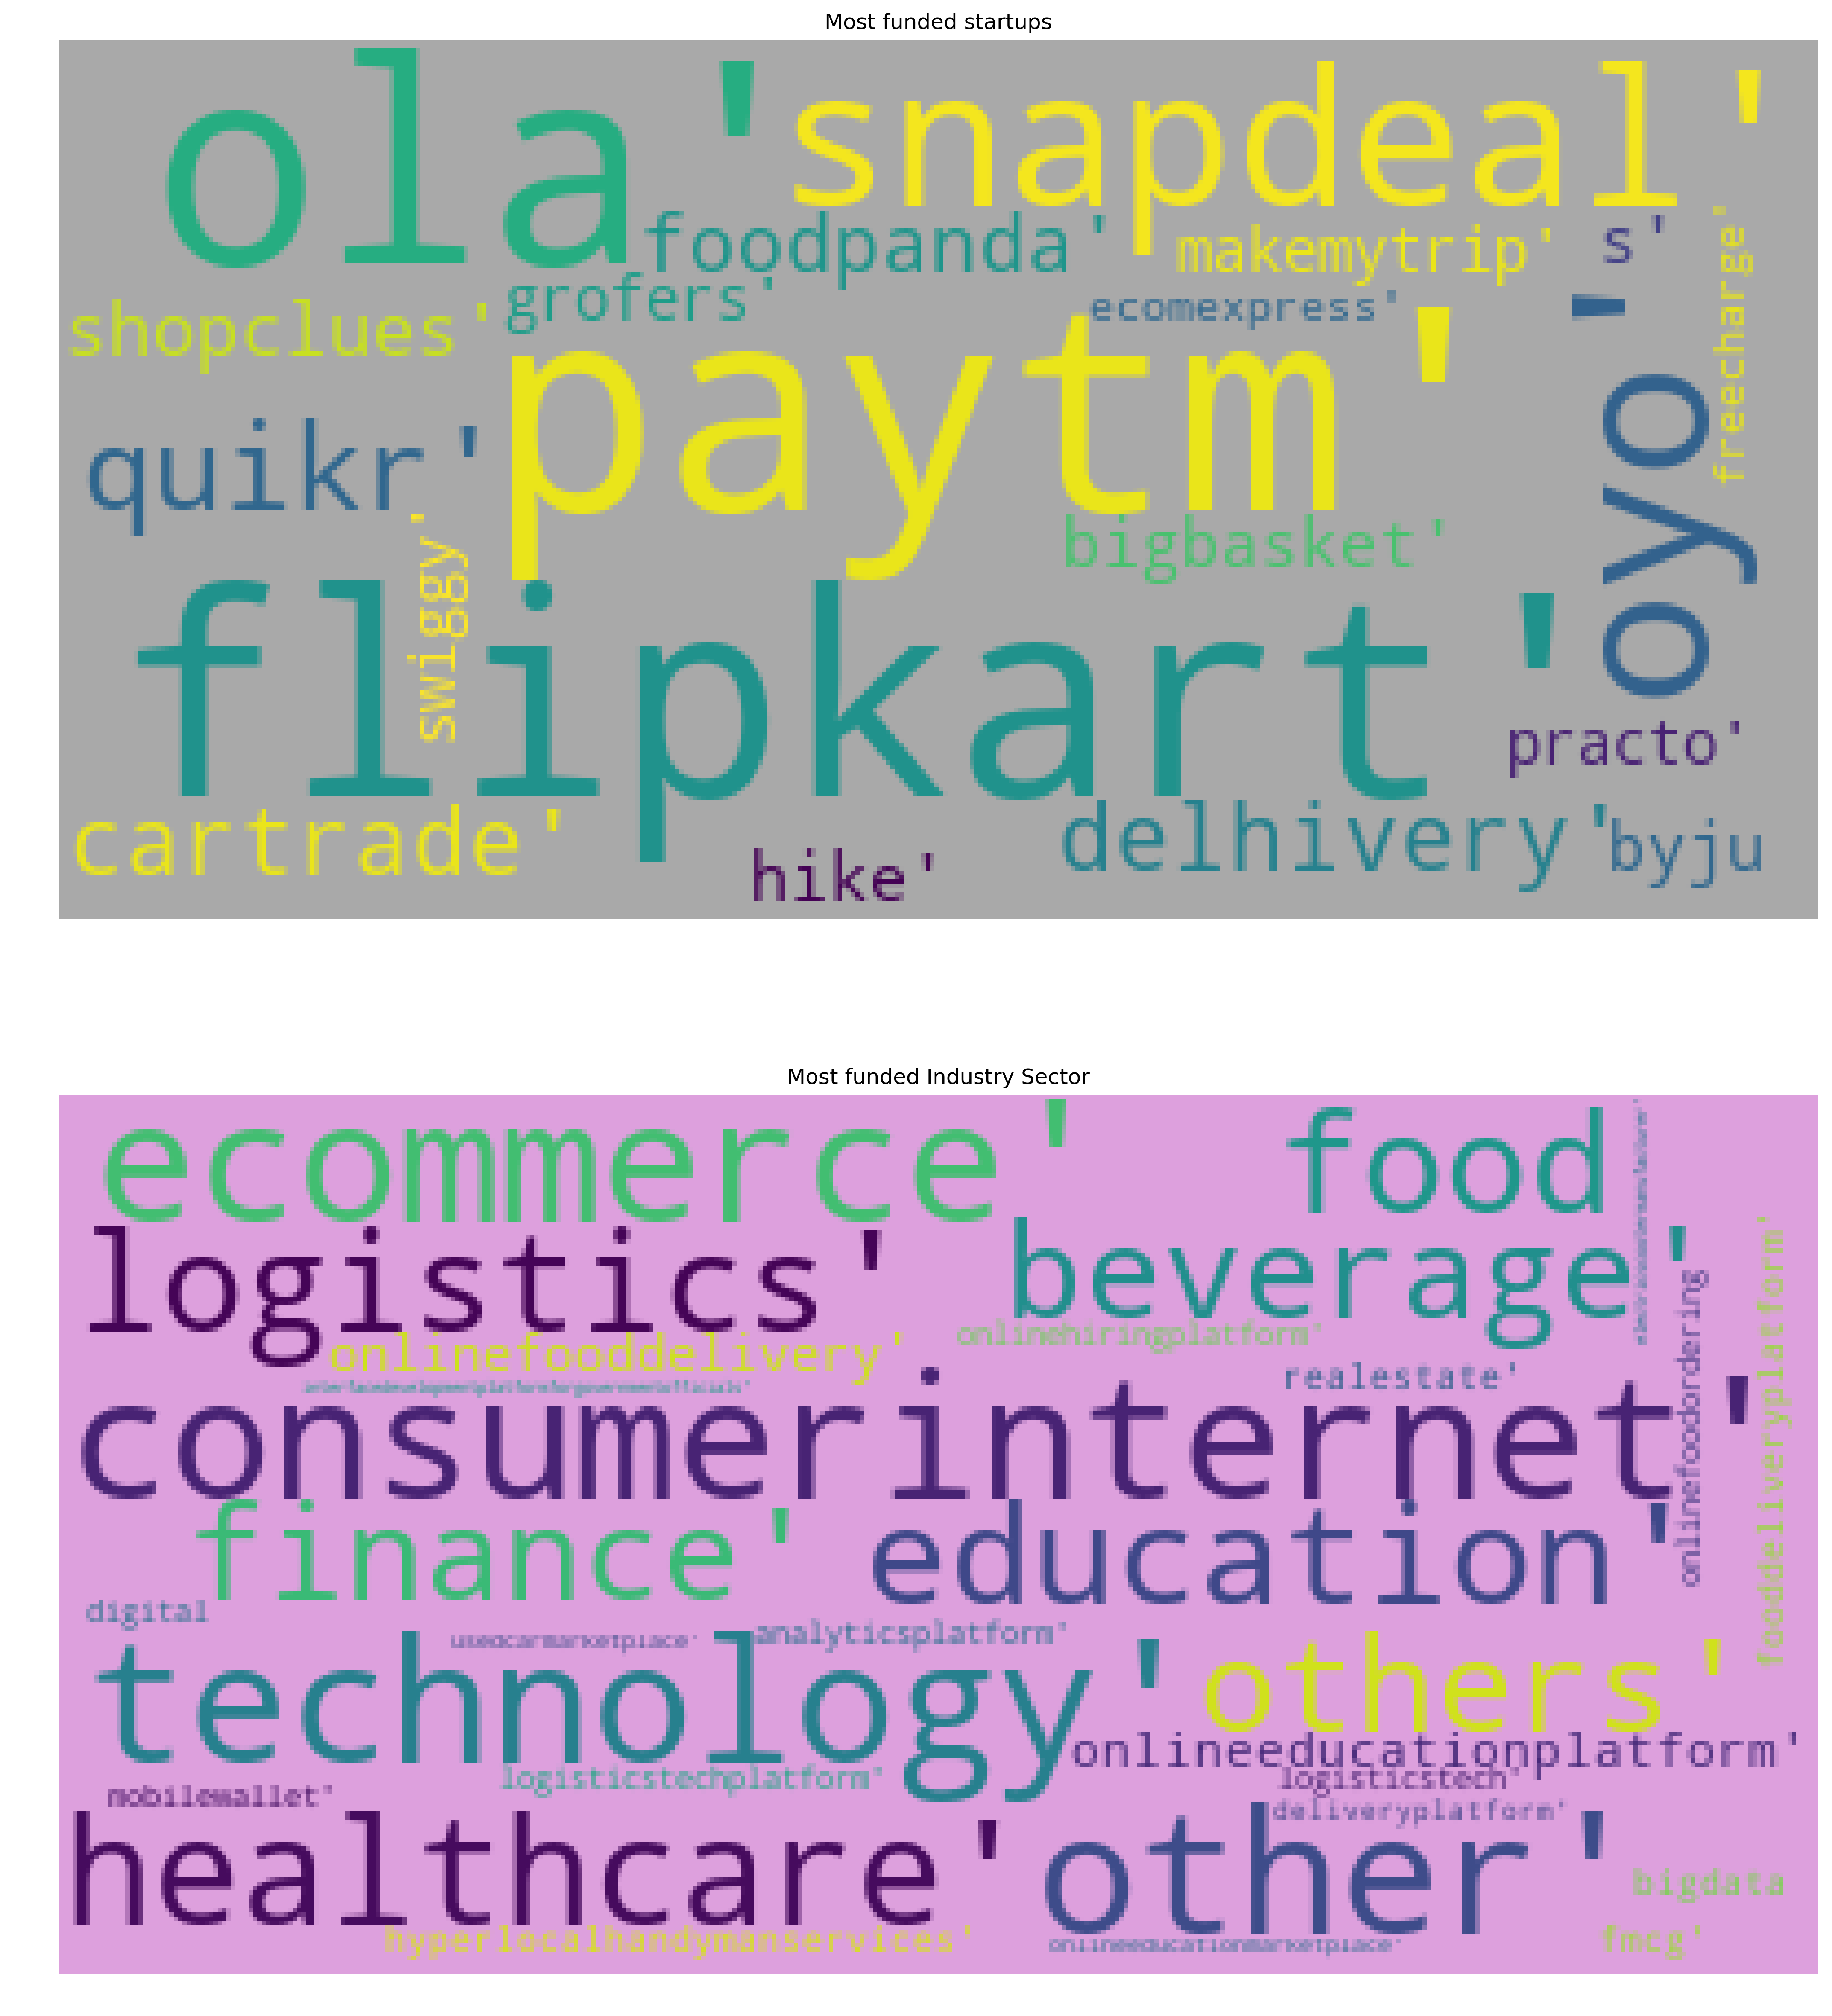

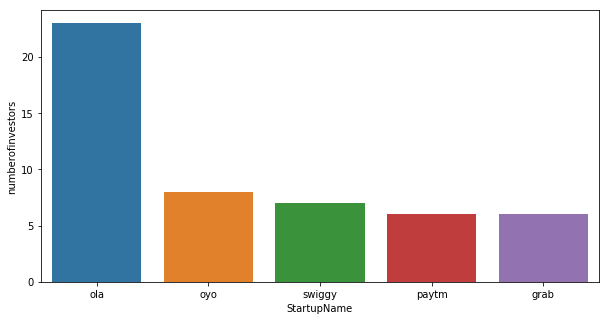

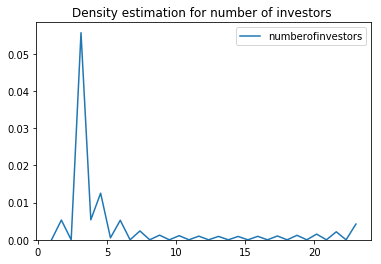

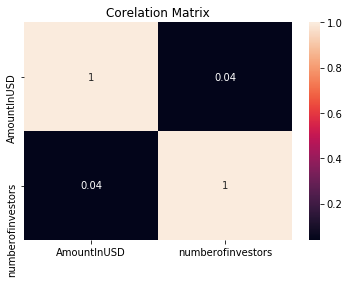

In [49]:
import numpy as np #used for scientific computation
import pandas as pd #used for data mugging and preprocessing
import matplotlib.pyplot as plt #data visualization library
from pandas import DataFrame as show # dataframe is the optimised structure used here to clean and analyse data
import seaborn as sns # stastical visualization library
import matplotlib  # used in jupyter notebook for interactive visualizations within notebook
import sys
!{sys.executable} -m pip install numpy
df=pd.read_csv('startup_funding.csv',dtype={'InvestmentType':'category'})#read_csv function is used to import dataset 'startup_funding.csv'
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
df.info(null_counts=True)
print('****************************')
print('Rows {rows} in total and Columns {columns} in total'.format(rows=df.shape[0],columns=df.shape[1]))
print('****************************')
print("Columns and their datatypes")
print (df.dtypes) #.dtypes are used to display datatypes of each column
print('*************CLEANING DATA***************')
print("Frequency count of missing values")
print (df.apply(lambda X:sum(X.isnull()))) 
#apply function is used to do mapping column-wise
#apply function can apply tranformations to each column individually
print('****************************')
plt.figure(figsize=(10,5)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()
#Here yellow bars repersent the null values(missing values)
#x axis represents colums(features) of dataset
print('************Print Wrong Format Dates****************')
print("Here we can see in date column error- '.' is there instead of '/'")
print (df[df['Date']=='12/05.2015']['Date'])
print('*************Fill Null values as not specific or others***************')
df['CityLocation']=df['CityLocation'].fillna(value='NotSpecific')
df['IndustryVertical']=df['IndustryVertical'].fillna(value='Other')
print('*************Converting Multiple City names into one***************')
import re#importing regular expressions
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()#converting  whole data to lower case to avoid dublicate entries 
    if   re.search('/',x):
        return x.split('/')[0].strip()#converting multiple citycentres to single one 
    else :
        return x.strip()# removing extra spaces from left and right to reduce duplicate cities
df['CityLocation']=df['CityLocation'].apply(convert_Slash)
print('*************Deleting Insignificant Columns which has high number of NA values***************')
newdf=df.copy()#backup cleansed data
del newdf['Remarks']#remaks is deleted to overcome stability in analysis
del newdf['SNo']
print('*************Investment type column has repeated values of categories therefore, removing them***************')
print('Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- ')
newdf['InvestmentType'].value_counts().index# aggregating frequency count according to categories of investment type
print('Different categories of Inverstment Type after cleansing and removing duplicacy in categories are as follows- ')
newdf['InvestmentType']=newdf['InvestmentType'].apply(lambda x:x.replace(' ','').lower())#code to apply mapping to remove duplicate categories
newdf['InvestmentType'].value_counts().index
print('*************Fomatting dates to time series***************')
def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):#data column has formatting errors like '12/052015','13/042015' where backslash (/) is missing or at wrong position
        return x.replace('.','')
    return x
newdf['Date']=newdf['Date'].apply(rem_err_date)#applying user defined funciton to date column using apply() which maps u.d.f to each record of date column
newdf['Date'].replace('12/052015','12/05/2015',inplace=True)
newdf['Date'].replace('15/012015','15/01/2015',inplace=True)
newdf['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdf['Date'].replace('13/042015','13/04/2015',inplace=True)
newdf['Date']=pd.to_datetime(newdf['Date'],format='%d/%m/%Y')#d/m/y is the format and to_datetime() is used to convert the datatype of date column to "datetime" from string
print('*************Preprocessing number of investors for each startup***************')
#As various startups have multiple number of investors arrange according to the number of investors for a particular startup(startup name)
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdf['numberofinvestors']=newdf['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)#removing missing investors and replacing with 'empty'
n_inv2=newdf

n_inv=newdf['InvestorsName']
n_inv.fillna(value='None',inplace=True)
listed_n_inv=n_inv.apply(lambda x: x.lower().strip().split(','))
investors=[]
for i in listed_n_inv:
    for j in i:
        if(i!='None' or i!=''):
            investors.append(j.strip())
unique_investors=list(set(investors))
investors=pd.Series(investors)
unique_investors=pd.Series(unique_investors)
investors=list(investors[investors!=''])
unique_investors=list(unique_investors[unique_investors!=''])
for i in range(len(unique_investors)):
    for j in range(len(investors)):
        if(re.search(unique_investors[i],investors[j])):
            investors[j]=unique_investors[i]

print('*************FILLING MISSING VALUES IN AmountInUSD***************')

def convert_AmountInUSD(x):
    if re.search(',',x):
        return (x.replace(',',''))
    return x
newdf['AmountInUSD']=newdf[newdf['AmountInUSD'].notnull()]['AmountInUSD'].apply(convert_AmountInUSD).astype('int')
newdf['AmountInUSD']=round(newdf['AmountInUSD'].fillna(np.mean(newdf['AmountInUSD'])))
newdf['AmountInUSD']=newdf['AmountInUSD'].astype('int')

print('*************FILLING MISSING VALUES IN InvestmentType***************')
newdf['InvestmentType'].fillna(method='bfill',inplace=True)#backward filling of null values
#Converting data into lower case to avoid duplicacy
newdf.iloc[:,[1,2,3,4,6]]=newdf.iloc[:,[1,2,3,4,6]].applymap(lambda x: x.lower().replace(' ','') if pd.notnull(x) is True else x )
def check(x):
    if(pd.notnull(x)):
        return x.lower()
newdf.iloc[:,3]=newdf.iloc[:,3].apply(check) 

print('*************Analysis of data after cleaning***************')

plt.figure(figsize=(10,5))
sns.heatmap(newdf.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

print('*************Removing ambigous records(startup names like flipkart and flipkart.com )***************')

unique_startup_name=list(newdf['StartupName'].unique())
startupname=list(newdf['StartupName'])
for i in range(len(unique_startup_name)):
    for j in range(len(startupname)):
        if(re.search(unique_startup_name[i],startupname[j])):
            startupname[j]=unique_startup_name[i]
newdf['StartupName']=startupname

print('*************Export Cleaned data to another excel sheet***************')

newdf.to_excel (r'startupfunding1.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path


print('*************In depth analysis***************')

#Funding of startups are highly dispersed and shown as investors are highly specific about startups

show(newdf.describe()['AmountInUSD'].astype(int))

#How many unique startups are introduced in year between 2015-2017?

print(newdf['StartupName'].nunique())

#Top 10 startups that had most funding

tp10fund=show(newdf.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False))
tp10fund.head(10)

#WordCloud of best startups and sectors by amount of funding
from wordcloud import WordCloud, STOPWORDS


st=pd.Series(newdf.groupby('StartupName').sum()['AmountInUSD'].sort_values(ascending=False).head(40).index).head(30)
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,20),dpi=300)

for char in range(len(st)):
    st[char]=st[char].replace(' ','_')

wc=WordCloud(max_words=20,stopwords=set(st),background_color='darkgrey',random_state=0).generate(str(st.values[:30]))
ax[0].axis('off')
ax[0].set_title('Most funded startups')
ax[0].imshow(wc)




c=np.array(newdf['IndustryVertical'].value_counts().head(30).index.unique())
for char in range(len(c)):
    c[char]=c[char].replace(' ','_')

               
wc=WordCloud(max_words=30,stopwords=set(c),background_color='plum',random_state=1).generate(str(c))

ax[1].axis('off')
ax[1].set_title('Most funded Industry Sector')

ax[1].imshow(wc)
plt.rcParams['axes.facecolor'] = 'white'

#DETAILS OF TOP 10 STARTUPS AS PER THE FUND GENERATED

#details of top 10 funded startups
def find(x):
    if x in tp10fund.head(10).index:
        return True
    return False

n=newdf[newdf['StartupName'].apply(find)]
print('amount funded on top 10 startups')
n.describe().iloc[:,0]


#Which kind of investment did the top10 startups got
#AS THE TOP 10 FUNDNDING AMOUNT ARE RECEIVED THROUGH PRIVATE EQUITY SO SORTING THE TOP 10 STARTUPS AS PER PRIVATE EQUITY BELOW THE PRIVATE EQUITY COLUMN REPRESENTS THE COUNT OF INVESTMENT TYPE
print (pd.crosstab(n['StartupName'],columns=n['InvestmentType']).sort_values(by='privateequity',ascending=False))

#Companies with most number of investors

cmi=show(newdf.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False))
fig=plt.figure(figsize=(10,5))
sns.barplot(y='numberofinvestors',x='StartupName',data=cmi.reset_index().head())
plt.show()
cmi.head(10)


#Here we can see that kernel density of startups having two and three number of investors is high

sns.kdeplot(data=cmi.reset_index()['numberofinvestors'],gridsize=20,)#most are  2 or 3 in number
plt.title('Density estimation for number of investors ')
plt.show()

#Is funding depends upon number of investors
#here we can see that there is 50% relation between funding amount and number of investors
top10=tp10fund.join(cmi)
sns.heatmap(newdf.corr(),annot=True)
plt.title('Corelation Matrix')
plt.show()
#what are the total number of unique investors
show(investors)[0].nunique()